In [ ]:
import nltk
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from collections import Counter
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

# Suppress warnings to keep the output clean
warnings.filterwarnings('ignore')

# Download stopwords corpus for later use
nltk.download('stopwords')

Analysis of Possible Duplicate Rows
The dataset contains 1,462,063 potentially duplicate rows out of a total of 2,463,419 rows, meaning approximately 59% of the data could be duplicates. These rows are considered potential duplicates because their topic, review, and score are identical to another row.

Hypothesis
We hypothesize that the length of a review influences its likelihood of being duplicated. Specifically, shorter reviews, which often use generic or simple phrases, are more likely to be repeated. In contrast, longer and more detailed reviews tend to have unique content and are less likely to appear multiple times.

For example:

"good": This review appears 6,488 times in the dataset, demonstrating how shorter, generic reviews are more likely to be repeated.
"His first great sprawling record it gets us into the rhythm and magic sexuality of Prince. It is before the majestic Purple Rain but there are glorious party-up-and-down songs like Little Red Corvette, Delirious, and the hijinks of Lady Cab Driver DMSR. The title track is the icing on one great dance rocker of an album and makes you forget every sensitive rock/pop offering when you are listening. This is the ultimate whambam thank you madam!": This highly specific review does not have any repetitions in the dataset.
Statistical Validation
To test the relationship between review length (word count) and duplication frequency, we calculated the Pearson correlation coefficient and the corresponding p-value:

Pearson correlation: -0.01
P-value: 0.000
The correlation of -0.01 suggests a very weak negative relationship between review length and duplication frequency. Although the p-value indicates statistical significance (p < 0.05), the effect size is negligible. This implies that while shorter reviews are somewhat more likely to be repeated, the overall relationship is not strong enough to draw definitive conclusions based solely on word count.

Observed Patterns
A scatterplot of review length (word count) versus repetition count provides additional insight. It shows that extremely short reviews (e.g., one or two words) are more likely to be repeated, while longer reviews rarely have duplicates. Despite the weak overall correlation, this pattern aligns intuitively with expectations.

Decision on Handling Duplicates
Despite the weak statistical relationship, it was decided to retain all rows, including the duplicates. This decision is based on the following considerations:

Representation of Real-World Data: The presence of duplicate rows reflects a real-world phenomenon, where shorter and simpler reviews are naturally repeated more frequently.
Preservation of Statistical Patterns: Removing duplicates could distort the underlying distribution of the data, particularly for shorter reviews, which may be over-represented due to their simplicity.
Value of Duplicate Data: Retaining duplicates ensures that we capture all perspectives, even if some are repeated, which could be valuable for downstream analysis such as identifying trends in user sentiment or preferences.
By retaining these duplicates, the dataset maintains its integrity and ensures the analysis reflects real-world behaviors.

In [9]:
def process_reviews(csv_file):
    """
    Reads a CSV file of reviews, removes duplicates, and adds character count.

    Args:
        csv_file (str): Path to the CSV file.

    Returns:
        pandas.DataFrame: Processed DataFrame with duplicates removed and char_count added.
    """

    df = pd.read_csv(csv_file)
    df.drop("Unnamed: 0", axis=1, inplace=True)
    print("Total null data per column:")
    print(df.isnull().sum())
    print("---------")
    print("Total rows:", len(df))

    df["review"] = df["review"].fillna("")

    df['duplicate_count'] = df.groupby(['review', 'score', 'review_topic']).transform('size')

    df = df.sort_values('duplicate_count', ascending=False)

    df = df.drop_duplicates(subset=df.columns[:-1], keep='first')

    df['char_count'] = df['review'].apply(lambda x: len(x))
    print("Total rows after removing possible duplicates:", len(df))

    correlation, p_value = pearsonr(processed_df['duplicate_count'], processed_df['char_count'])

    print("---------")
    print(f"Pearson correlation: {correlation:.2f}")
    print(f"P-value: {p_value:.3f}")

    return df

processed_df = process_reviews("2.5m-reviews-dataset.csv")

Total null data per column:
review_topic        0
review          24842
score               0
dtype: int64
---------
Total rows: 2463419
Total rows after removing possible duplicates: 1001356
---------
Pearson correlation: -0.01
P-value: 0.000


In [3]:
processed_df.head(20)

,review_topic,review,score,duplicate_count,char_count
2225498,Products,,5.0,13118,0
1016064,Course,good,5.0,6488,4
2279946,Products,brilliant,5.0,5629,9
2355453,Products,awesome,5.0,5624,7
2357478,Products,great product,5.0,5613,13
2380648,Products,worth every penny,5.0,5594,17
2218975,Products,classy product,5.0,5591,14
2279872,Products,perfect product!,5.0,5588,16
2378801,Products,simply awesome,5.0,5583,14
2279923,Products,wonderful,5.0,5581,9


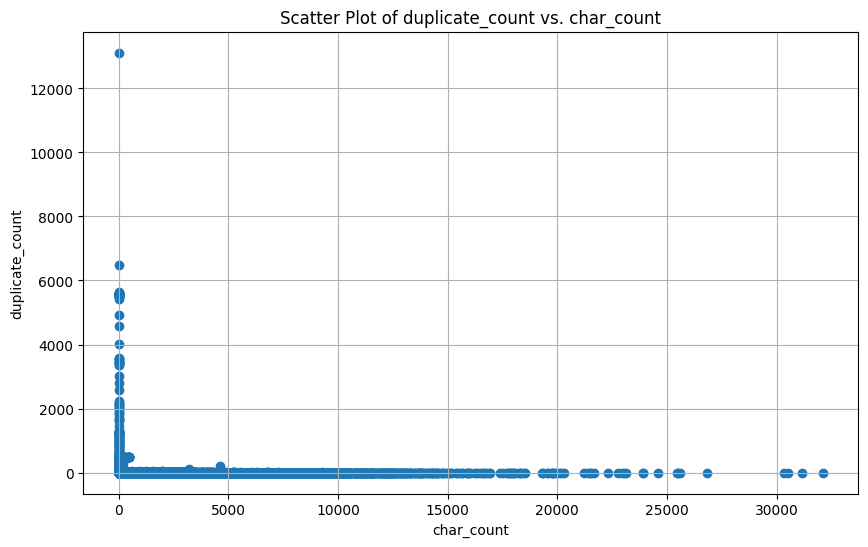

In [122]:
def create_scatter_plot(df, x_column, y_column):
    """
    Creates a scatter plot of two columns from a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to use on the x-axis.
        y_column (str): The name of the column to use on the y-axis.
    """

    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.scatter(df[x_column], df[y_column])  # Alpha for transparency

    # Add labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter Plot of {y_column} vs. {x_column}")

    # Show the plot
    plt.grid(True)
    plt.show()

create_scatter_plot(processed_df, "char_count", "duplicate_count")

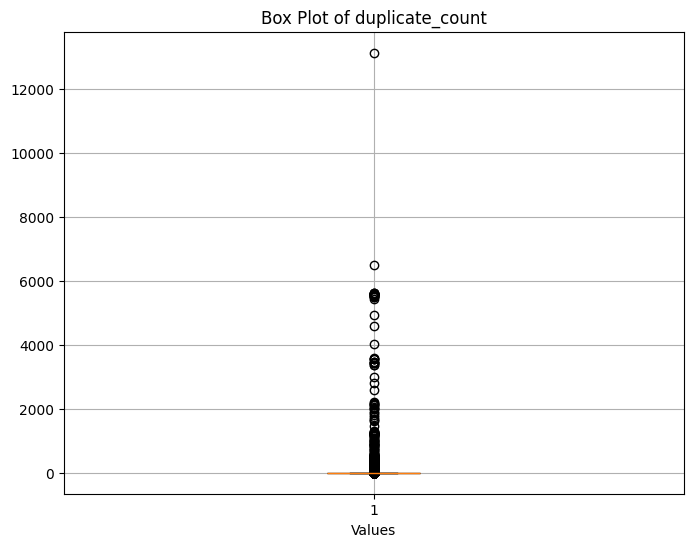

In [121]:
def create_box_plot(data, column_name, color):
  """
  Creates a vertical box plot with a specified color.

  Args:
    data: DataFrame containing the data.
    column_name: Name of the column to plot.
    color: Color of the box plot.
  """
  plt.figure(figsize=(8, 6))
  plt.boxplot(data[column_name], patch_artist=True,
              boxprops=dict(facecolor=color))
  plt.xlabel("Values")
  plt.title(f"Box Plot of {column_name}")
  plt.grid(True)
  plt.show()

create_box_plot(processed_df, "duplicate_count", "coral")